### Linkedln Challenge
## Stack overflow Annual Developer Survey

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
survey = pd.read_csv("survey_results_public.csv")
#survey.head()

## 1. How many developers participated in this survey?

In [3]:
survey.Respondent.count()

64461

## 2. Find the top ten countries participating devs are from

In [4]:
Top_ten = survey.groupby("Country").count().sort_values(by="Respondent",ascending=False).head(10)
Top_ten1 = Top_ten[["Respondent"]]
index = np.arange(1,11)
Top_ten1.reset_index(level=0,inplace=True)
Top_ten1.index = index
Top_ten1

,Country,Respondent
1,United States,12469
2,India,8403
3,United Kingdom,3896
4,Germany,3890
5,Canada,2191
6,France,1898
7,Brazil,1818
8,Netherlands,1343
9,Poland,1278
10,Australia,1208


## 3. How many are from Nigeria?

In [5]:
Naija_dev = survey[survey["Country"]=="Nigeria"]
len(Naija_dev)

593

## 4. What is the average age the Nigeria dev wrote their first code?

In [161]:
print(math.ceil(Naija_dev["Age1stCode"].astype(float).mean()),"years")


20 years


## 5. What is the average age of the Nigerian dev?

In [159]:
print(math.ceil(Naija_dev.Age.dropna().mean()),"years")

26 years


## 6. What are the kind of employment they are in?

In [34]:
Naija_dev_Employment = Naija_dev.groupby("Employment").count().sort_values(by="Respondent",ascending=False)[["Respondent"]].reset_index()
Naija_dev_Employment


,Employment,Respondent
0,Employed full-time,187
1,Student,135
2,"Not employed, but looking for work",118
3,"Independent contractor, freelancer, or self-em...",109
4,Employed part-time,36
5,"Not employed, and not looking for work",4


## 7. What is the gender distribution?

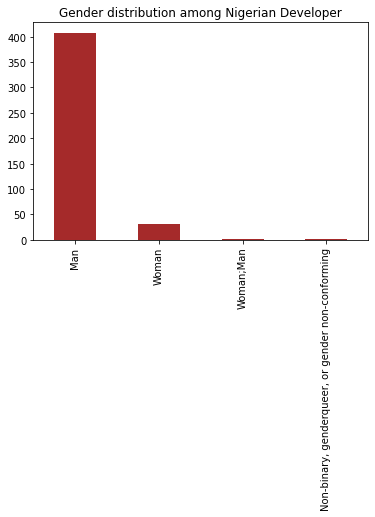

None

,Gender,Total
0,Man,408
1,Woman,31
2,Woman;Man,2
3,"Non-binary, genderqueer, or gender non-conforming",1


In [77]:
gender_distribution = pd.DataFrame(Naija_dev["Gender"].value_counts().reset_index())
gender_distribution.rename(columns={"index":"Gender","Gender":"Total"},inplace=True)
Naija_dev["Gender"].value_counts().plot(kind="bar",color ="brown")
plt.title("Gender distribution among Nigerian Developer")
display(plt.show(),gender_distribution)


## 8. What major did they study in school?

In [10]:
major = pd.DataFrame(Naija_dev["UndergradMajor"].value_counts())
major.rename(columns={"UndergradMajor":"Total"},inplace=True)
major.index.names = ["Undergraduate Major"]
major.reset_index()

,Undergraduate Major,Total
0,"Computer science, computer engineering, or sof...",192
1,"Another engineering discipline (such as civil,...",62
2,"A natural science (such as biology, chemistry,...",32
3,Mathematics or statistics,24
4,"Information systems, information technology, o...",23
5,"A business discipline (such as accounting, fin...",18
6,"A health science (such as nursing, pharmacy, r...",10
7,"A humanities discipline (such as literature, h...",9
8,"A social science (such as anthropology, psycho...",9
9,Web development or web design,8


## 9. What languages have they worked with?

In [136]:
#Drop null values and replace remove ";"
b = pd.DataFrame(Naija_dev["LanguageWorkedWith"].dropna().str.split(";"))
#set it as list
c = list((b["LanguageWorkedWith"].iloc[1:]))

from functools import reduce
import operator
#flat the list
d = reduce(operator.concat,c)
#Turn it into dataframe
e= pd.DataFrame({"Programming Languages":d})
Naija_dev_language = pd.DataFrame(e["Programming Languages"].value_counts())

Naija_dev_language.index.names = ["Nigeria Dev Programming Languages worked with"]
Naija_dev_language.reset_index()
Naija_dev_language.rename(columns={"Programming Languages":"Total"},inplace=True)
Naija_dev_language

,Total
Nigeria Dev Programming Languages worked with,
HTML/CSS,395
JavaScript,365
SQL,242
PHP,218
Python,192
Java,174
C#,99
TypeScript,85
C++,74


## 10. What is the average number of languages they have worked with?

In [158]:
math.ceil(Naija_dev["LanguageWorkedWith"].value_counts().mean())

2

## 11. What is the average number of years of experience of the Nigerian developer?

In [157]:
# set age the less than 1 year as 0.5 years
def age(x):
    if x == "Less than 1 year":
        return 0.5
    else:
        return x
Naija_dev.YearsCodePro = Naija_dev.YearsCodePro.apply(age)
print(math.ceil(Naija_dev["YearsCodePro"].astype(float).mean()),"years")


5 years


## 12. How many dev are women,age below 25 and earn a living from dev?

In [14]:
survey.Employment.value_counts()
age_less_25 = survey[survey["Age"]<25]
women_age_less_than_25 = age_less_25[age_less_25["Gender"]=="Woman"]
len(women_age_less_than_25[women_age_less_than_25["Employment"].isin(["Employed full-time","Independent contractor, freelancer, or self-employed","Employed part-time"])])

498

## 13. What are the 10 most popular languages among Naija devs?

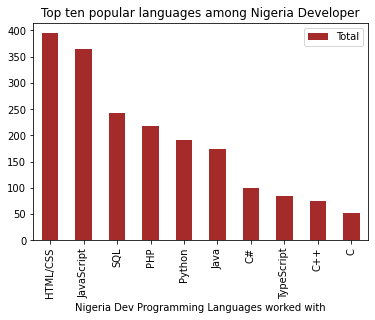

None

,Total
Nigeria Dev Programming Languages worked with,
HTML/CSS,395
JavaScript,365
SQL,242
PHP,218
Python,192
Java,174
C#,99
TypeScript,85
C++,74


In [139]:
Naija_dev_language.head(10).plot(kind="bar", color= "brown")
plt.title("Top ten popular languages among Nigeria Developer")
display(plt.show(),f)